In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import struct

## Step 2: load the dataset

In [ ]:

def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows * cols)
        images = images.astype(np.float64) / 255.0  # normalize to [0, 1]
        return images

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

In [ ]:

X_train = load_mnist_images('train-images.idx3-ubyte')
y_train = load_mnist_labels('train-labels.idx1-ubyte')
X_test = load_mnist_images('t10k-images.idx3-ubyte')
y_test = load_mnist_labels('t10k-labels.idx1-ubyte')


## Step 2: Standardize the dataset

In [ ]:
# Step 2: Standardize the dataset
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 0.00000000000000001  # avoid division by zero
    X = (X - mean) / std
    return X

X_train = standardize(X_train)
X_test = standardize(X_test)


# Step 3: Divide data into training and test sets

In [ ]:

def train_test_split(X, y, test_size):
    split_index = int(X.shape[0] * (1 - test_size))
    X_train = X[:split_index]
    y_train = y[:split_index]
    X_test = X[split_index:]
    y_test = y[split_index:]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_test_split(X_train, y_train, test_size=0.2)

## Step 4: Apply one-hot encoding to labels


In [ ]:

def one_hot_encoding(labels, num_classes):
    encoded_labels = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        encoded_labels[i][label] = 1
    return encoded_labels

num_classes = 10
y_train_encoded = one_hot_encoding(y_train, num_classes)
y_test_encoded = one_hot_encoding(y_test, num_classes)


# Step 5: Build the model


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
]


## Step 6: Compile the model

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Step 7: Train the model

In [19]:

history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.2643 - accuracy: 0.9224 - val_loss: 0.1910 - val_accuracy: 0.9446
Epoch 2/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1077 - accuracy: 0.9680 - val_loss: 0.1592 - val_accuracy: 0.9572
Epoch 3/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0720 - accuracy: 0.9784 - val_loss: 0.1670 - val_accuracy: 0.9571
Epoch 4/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0524 - accuracy: 0.9842 - val_loss: 0.1862 - val_accuracy: 0.9581
Epoch 5/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0524 - accuracy: 0.9848 - val_loss: 0.2099 - val_accuracy: 0.9599
Epoch 6/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.2326 - val_accuracy: 0.9571
Epoch 7/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.2258 - val_accuracy:

# Step 8: Evaluate the model

In [20]:

test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print('Test accuracy:', test_acc)



375/375 [==============================] - 0s 665us/step - loss: 0.2040 - accuracy: 0.9671
Test accuracy: 0.9670833349227905


# Step 9: Make predictions

In [21]:

predictions = model.predict(X_test)


375/375 [==============================] - 0s 586us/step


# Visualize the accuracy and loss during training

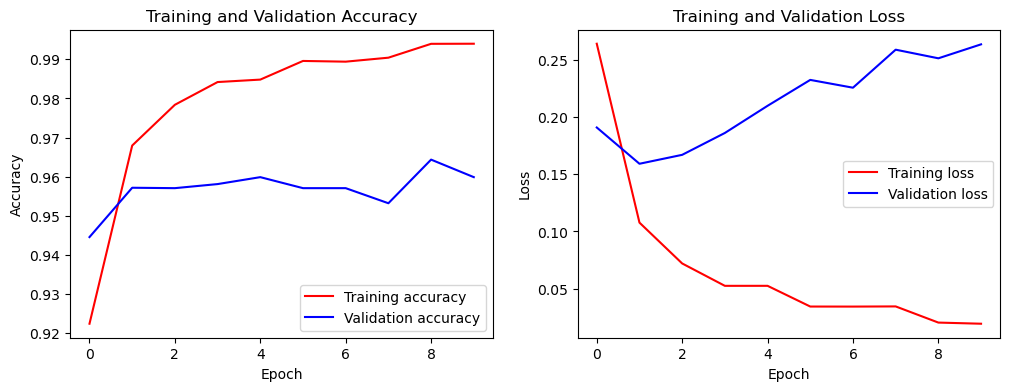

In [23]:
# Visualize the accuracy and loss during training
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()